In [ ]:
import numpy as np
import scipy.stats as stats

def h(X):
    return (X**5) / (1 + (X - 3)**2) * (X >= 0)

v = 12  

N = 10000

samples = stats.t.rvs(df=v, size=N)

monte_carlo_estimate = np.mean(h(samples))

print(f"Monte Carlo Estimate: {monte_carlo_estimate}")


Monte Carlo Estimate: 4.356873332267444


In [51]:
# Cauchy(0, 1) distribution
def g_cauchy(x):
    return 1 / (np.pi * (1 + x**2))

def importance_sampling_cauchy(samples, v):
    f_samples = stats.t.pdf(samples, df=v)
    g_samples = g_cauchy(samples)
    weights = f_samples / g_samples
    h_values = h(samples)
    
    estimate = np.mean(weights * h_values)
    
    return estimate
samples_cauchy = np.random.standard_cauchy(size=N)

is_cauchy_estimate = importance_sampling_cauchy(samples_cauchy, v)
print(f"Importance Sampling Estimate (Cauchy Proposal): {is_cauchy_estimate}")


Importance Sampling Estimate (Cauchy Proposal): 4.584145556986859


In [24]:
# Normal distribution proposal with mean 0 and variance v / (v - 2)
def g_normal(x, v):
    return stats.norm.pdf(x, loc=0, scale=np.sqrt(v / (v - 2)))

# Compute the Importance Sampling estimator with Normal proposal distribution
def importance_sampling_normal(samples, N, v):
    # Target distribution f (Student's t-distribution)
    f_samples = stats.t.pdf(samples, df=v)
    
    # Proposal distribution g (Normal)
    g_samples = g_normal(samples, v)
    
    # Calculate the weighted sum for Importance Sampling
    weights = f_samples / g_samples
    h_values = h(samples)
    
    # Estimate
    estimate = np.mean(weights * h_values)
    
    return estimate

# Draw samples from the Normal(0, v/(v-2)) distribution
samples_normal = np.random.normal(0, np.sqrt(v / (v - 2)), size=N)

# Calculate the Importance Sampling estimate for Normal proposal distribution
is_normal_estimate = importance_sampling_normal(samples_normal, N, v)
print(f"Importance Sampling Estimate (Normal Proposal): {is_normal_estimate}")


Importance Sampling Estimate (Normal Proposal): 4.808474402893745


In [25]:
# Exponential distribution with rate λ = 1
def g_exponential(x):
    return np.exp(-x) * (x >= 0)

# Compute the Importance Sampling estimator with Exponential proposal distribution
def importance_sampling_exponential(samples, N):
    # Target distribution f (Student's t-distribution)
    f_samples = stats.t.pdf(samples, df=v)
    
    # Proposal distribution g (Exponential)
    g_samples = g_exponential(samples)
    
    # Calculate the weighted sum for Importance Sampling
    weights = f_samples / g_samples
    h_values = h(samples)
    
    # Estimate
    estimate = np.mean(weights * h_values)
    
    return estimate

# Draw samples from the Exponential(λ=1) distribution
samples_exponential = np.random.exponential(1, size=N)

# Calculate the Importance Sampling estimate for Exponential proposal distribution
is_exponential_estimate = importance_sampling_exponential(samples_exponential, N)
print(f"Importance Sampling Estimate (Exponential Proposal): {is_exponential_estimate}")


Importance Sampling Estimate (Exponential Proposal): 4.294734160437227


In [46]:
samples= []
for i in range(1000):
    samples_exponential = np.random.exponential(1, size=N)
    is_exponential_estimate = importance_sampling_exponential(samples_exponential, N)
    samples.append(is_exponential_estimate)
data = np.array(samples)
data

array([4.35823517, 4.50023048, 4.42429787, 4.30576721, 4.56999037,
       4.459852  , 4.39015234, 4.62006917, 4.5990806 , 4.58567414,
       4.55082192, 4.58970834, 4.39376828, 4.51116382, 4.53731203,
       4.43797731, 4.38759496, 4.24250185, 4.75574327, 4.59458751,
       4.37764283, 4.5074044 , 4.35231376, 4.61737235, 4.61335287,
       4.41479255, 4.58260097, 4.41616071, 4.57423736, 4.44598228,
       4.36758716, 4.53657479, 4.58235197, 4.56365658, 4.67541722,
       4.35734653, 4.78925626, 4.61624067, 4.43186053, 4.57196322,
       4.28110358, 4.48316101, 4.50535542, 4.71705143, 4.39673799,
       4.55565556, 4.60615067, 4.50196073, 4.52161533, 4.46884651,
       4.52249787, 4.52661872, 4.56374404, 4.78901042, 4.61932665,
       4.44301407, 4.49968407, 4.641012  , 4.48015756, 4.39904895,
       4.55172391, 4.37413412, 4.51261613, 4.56284199, 4.50582413,
       4.50878132, 4.66847663, 4.51893124, 4.55091061, 4.33882274,
       4.48913626, 4.35184933, 4.35539579, 4.31958698, 4.44893

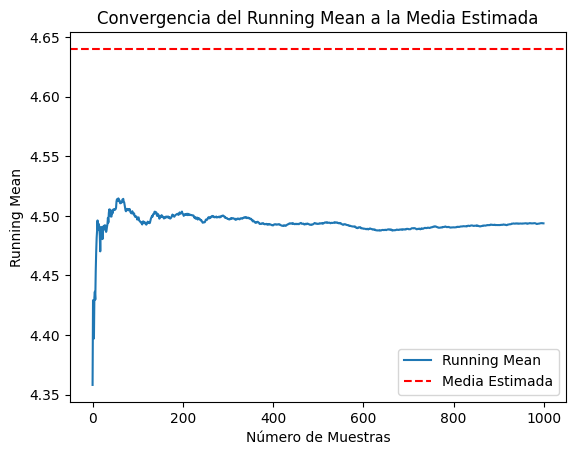

In [47]:
# Estimar E[X^2] y construir la gráfica de la convergencia de los "running means"
running_means = np.cumsum(data) / np.arange(1, 1000 + 1)

# Graficar la convergencia
plt.plot(running_means, label="Running Mean")
plt.axhline(y=4.64, color="r", linestyle="--", label="Media Estimada")
plt.xlabel("Número de Muestras")
plt.ylabel("Running Mean")
plt.legend()
plt.title("Convergencia del Running Mean a la Media Estimada")
plt.show()